# Step 1: Business Problems(Define the Problems)

- Identify the key factors that influence students performances.
- Also identify students who are at risk of underperforming.
- Provide a Data-Driven strategy to enhance academic outcomes.
- Develop visualizations and summary stats to communicate findings effectively.
- Analyze the distribution of key variables and detect any correlation between them.

**import libararies for analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Step 2.1: Load the Data

In [2]:
data=pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Step 2.2: Data Understanding

In [4]:
#to understand detailed information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

- Here we can observe that there are 6607 records and 20 columns
- we can see that some records as missing as well
- Here we get familiar with all columns and its dtypes

In [5]:
data.shape

(6607, 20)

- Total 20 columns and 6607 rows available

In [6]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
data['Hours_Studied']

0       23
1       19
2       24
3       29
4       19
        ..
6602    25
6603    23
6604    20
6605    10
6606    15
Name: Hours_Studied, Length: 6607, dtype: int64

- Here all data is in int dtype and no null value present

In [8]:
data['Attendance']

0       84
1       64
2       98
3       89
4       92
        ..
6602    69
6603    76
6604    90
6605    86
6606    67
Name: Attendance, Length: 6607, dtype: int64

- Similarly, no null value present and int dtype

In [9]:
data['Parental_Involvement'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [10]:
data['Parental_Involvement'].value_counts()

Medium    3362
High      1908
Low       1337
Name: Parental_Involvement, dtype: int64

- Parental Involvement is ordinal data and it shows less number of parental involvement is low

In [11]:
data['Access_to_Resources'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [12]:
data['Access_to_Resources'].value_counts()

Medium    3319
High      1975
Low       1313
Name: Access_to_Resources, dtype: int64

- it shows the number is very much similar to the Parental Involvement numbers

In [13]:
data['Extracurricular_Activities'].value_counts()

Yes    3938
No     2669
Name: Extracurricular_Activities, dtype: int64

- Means more number of students are participating in extra circular activities comparatively

In [14]:
data['Sleep_Hours'].value_counts()

7     1741
8     1399
6     1376
9      775
5      695
10     312
4      309
Name: Sleep_Hours, dtype: int64

In [15]:
data['Previous_Scores']

0       73
1       59
2       91
3       98
4       65
        ..
6602    76
6603    81
6604    65
6605    91
6606    94
Name: Previous_Scores, Length: 6607, dtype: int64

In [16]:
data['Motivation_Level'].nunique()

3

In [17]:
data['Motivation_Level'].value_counts()

Medium    3351
Low       1937
High      1319
Name: Motivation_Level, dtype: int64

In [18]:
data['Internet_Access'].value_counts()

Yes    6108
No      499
Name: Internet_Access, dtype: int64

- Means most of the students have internet access

In [19]:
data['Tutoring_Sessions']

0       0
1       2
2       2
3       1
4       3
       ..
6602    1
6603    3
6604    3
6605    2
6606    0
Name: Tutoring_Sessions, Length: 6607, dtype: int64

In [20]:
data['Tutoring_Sessions'].value_counts()

1    2179
2    1649
0    1513
3     836
4     301
5     103
6      18
7       7
8       1
Name: Tutoring_Sessions, dtype: int64

- Here it is int dtype but it is in (0,1,2,3,4,5,6,7,8)
- from this data 1513 students are not taking tution
- most of the students are taking 1 or 2 sessions

In [21]:
data['Family_Income'].value_counts()

Low       2672
Medium    2666
High      1269
Name: Family_Income, dtype: int64

- Less students have high family income

In [22]:
data['Teacher_Quality'].value_counts()

Medium    3925
High      1947
Low        657
Name: Teacher_Quality, dtype: int64

In [23]:
data['School_Type'].value_counts()

Public     4598
Private    2009
Name: School_Type, dtype: int64

- Maximum Students are going to public schools

In [24]:
data['Peer_Influence'].value_counts()

Positive    2638
Neutral     2592
Negative    1377
Name: Peer_Influence, dtype: int64

In [25]:
data['Physical_Activity']

0       3
1       4
2       4
3       4
4       4
       ..
6602    2
6603    2
6604    2
6605    3
6606    4
Name: Physical_Activity, Length: 6607, dtype: int64

In [26]:
data['Physical_Activity'].value_counts()

3    2545
2    1627
4    1575
1     421
5     361
0      46
6      32
Name: Physical_Activity, dtype: int64

In [27]:
data['Learning_Disabilities'].value_counts()

No     5912
Yes     695
Name: Learning_Disabilities, dtype: int64

- means 695 students out of 6607 have learning disabilities

In [28]:
data['Parental_Education_Level'].value_counts()

High School     3223
College         1989
Postgraduate    1305
Name: Parental_Education_Level, dtype: int64

In [29]:
data['Distance_from_Home'].value_counts()

Near        3884
Moderate    1998
Far          658
Name: Distance_from_Home, dtype: int64

- very few students lives far from school

In [30]:
data['Gender'].value_counts()

Male      3814
Female    2793
Name: Gender, dtype: int64

In [31]:
data['Exam_Score']

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64

In [32]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [33]:
continuous=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']
discrete_categorical=['Gender','Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level',
                     'Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities',
                     'Parental_Education_Level','Distance_from_Home']

In [34]:
data[continuous].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [35]:
data[discrete_categorical].describe().T

,count,unique,top,freq
Gender,6607,2,Male,3814
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638


In [36]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

**We have 3 columns that have null values**
1. Teacher_Quality
2. Parental_Education_level
3. Distance_from_home

# Step 3: Data Cleaning and Preprocessing

**1. Handling Missing Values**

In [37]:
missing_count=data['Teacher_Quality'].isnull().sum()
print("Missing Count:" ,missing_count)
missing_percentage = (missing_count / len(data)) * 100
print(f"Percentage missing: {missing_percentage}%")

Missing Count: 78
Percentage missing: 1.1805660662933253%


In [38]:
mode_value=data['Teacher_Quality'].mode()[0]
data['Teacher_Quality'].fillna(mode_value, inplace=True)
print(mode_value)

Medium


In [39]:
data['Teacher_Quality'].isnull().sum()

0

**So, We have handle the missing value using mode imputation means Most frequent values of that particular columns i.e. Medium**

In [40]:
#now parental_education_level
data[data['Parental_Education_Level'].isnull()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
408,21,65,High,High,No,7,88,Low,Yes,2,Low,Medium,Private,Neutral,1,No,NaN,Near,Male,65
417,21,91,High,Medium,No,9,74,Medium,Yes,2,Low,Low,Private,Negative,2,No,NaN,Near,Female,69
451,26,94,High,Medium,Yes,10,54,Low,Yes,2,High,Medium,Public,Neutral,5,No,NaN,Near,Male,73
592,23,85,High,Low,Yes,6,59,Low,Yes,1,Medium,Medium,Public,Negative,1,No,NaN,Near,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6253,22,85,High,Medium,Yes,6,96,Medium,Yes,0,Low,Medium,Public,Neutral,3,No,NaN,Moderate,Female,69
6323,28,72,Low,High,No,8,63,Low,Yes,1,Low,High,Public,Neutral,2,No,NaN,Near,Male,66
6411,19,92,High,Medium,No,6,70,High,Yes,2,Medium,Medium,Private,Negative,3,No,NaN,Near,Female,71
6423,21,70,Medium,High,Yes,5,62,Medium,Yes,2,Low,High,Public,Neutral,2,No,NaN,Near,Female,66


- Here i was checking the pattern that any correaltion of parents with family income or involvement
- And i have observed that we can't denied the fact that if family involvement in education is high then no correaltion
- so again we have to go with same concepts of mode imputation

In [41]:
mode_value=data['Parental_Education_Level'].mode()[0]
data['Parental_Education_Level'].fillna(mode_value, inplace=True)
print(mode_value)

High School


In [42]:
data['Parental_Education_Level'].isnull().sum()

0

In [43]:
#now distance from home
data[data['Distance_from_Home'].isnull()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
359,15,64,Medium,Medium,Yes,6,76,High,Yes,2,Medium,Medium,Private,Positive,4,Yes,High School,NaN,Female,63
380,15,70,High,Medium,No,9,57,Medium,Yes,1,Medium,Medium,Private,Negative,3,No,High School,NaN,Female,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,11,72,High,Low,No,8,55,High,Yes,0,Medium,Low,Public,Neutral,3,Yes,College,NaN,Male,60
6494,14,77,Medium,Medium,Yes,4,81,Low,Yes,3,Medium,Medium,Private,Neutral,3,No,College,NaN,Female,66
6496,26,77,Low,Medium,Yes,7,71,High,Yes,3,High,Medium,Public,Neutral,3,No,High School,NaN,Female,69
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70


- Again we have to go with same Mode imputation method

In [44]:
mode_value=data['Distance_from_Home'].mode()[0]
data['Distance_from_Home'].fillna(mode_value, inplace=True)
print(mode_value)

Near


In [45]:
data['Distance_from_Home'].isnull().sum()

0

**Hence we have treated the missing values by using Mode imputation**

In [46]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

**2. Checking for Duplicates**

In [47]:
data.duplicated().sum()

0

- Hence no duplicate record has been found in this dataset

**3. Data Transformation**

In [48]:
data['Hours_Studied'].describe()

count    6607.000000
mean       19.975329
std         5.990594
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64

In [49]:
bins=[0,15,30,45]
labels=['Low','Moderate','High']
data['Study_Hours']=pd.cut(data['Hours_Studied'], bins=bins, labels=labels)

In [50]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Study_Hours
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,Moderate
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,Moderate
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,Moderate
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,Moderate
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,Moderate


In [51]:
pd.crosstab(data['Study_Hours'],data['Gender'],margins=True)

Gender,Female,Male,All
Study_Hours,,,
Low,631,874,1505
Moderate,2063,2786,4849
High,99,154,253
All,2793,3814,6607


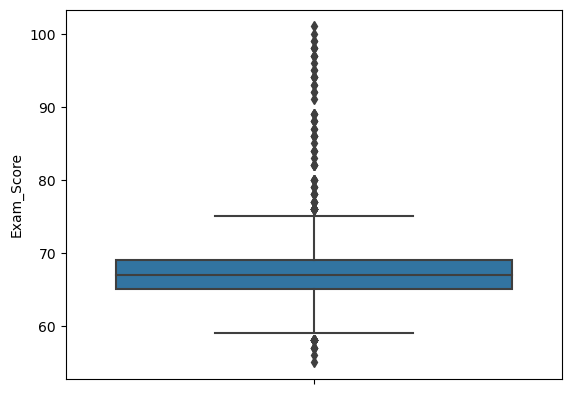

In [72]:
sns.boxplot(y=data['Exam_Score'])
plt.show()

In [68]:
data[data['Exam_Score']>100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Study_Hours
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101,Moderate


In [73]:
data['Exam_Score'].skew()

1.6448082853982677

In [74]:
data['Exam_Score']=data['Exam_Score'].replace(101,69)

In [78]:
data[data['Exam_Score']>100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Study_Hours


**3.1: Checking and treating outliers**

1. Hours_Studied

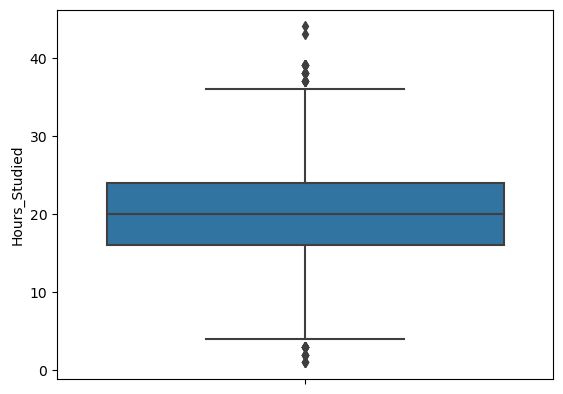

In [54]:
sns.boxplot(y=data['Hours_Studied'])
plt.show()

- Here Outliers are present and for treating outlier we should have to choose IQR method
- first we have to find Q1 i.e. 25 percentile and Q3 i.e. 75 percentile
- IQR=Q3-Q1 (InterQuartile Range)
- low_lim=Q1-(1.5xIQR) & upper_lim=Q3+(1.5xIQR)
- Those values which are greater than upper limit or less than lower limit are known as outliers
- from descriptive statistical analysis above we can clearly take the Q1 and Q3 value

In [55]:
#for studied hours column only
Q1=16
Q3=24
IQR=Q3-Q1
print("IQR: ",IQR)
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print("Lower Limit: ",low_lim)
print("Upper Limit: ",up_lim)

IQR:  8
Lower Limit:  4.0
Upper Limit:  36.0


In [56]:
data[(data['Hours_Studied']<low_lim)|(data['Hours_Studied']>up_lim)].shape

(43, 21)

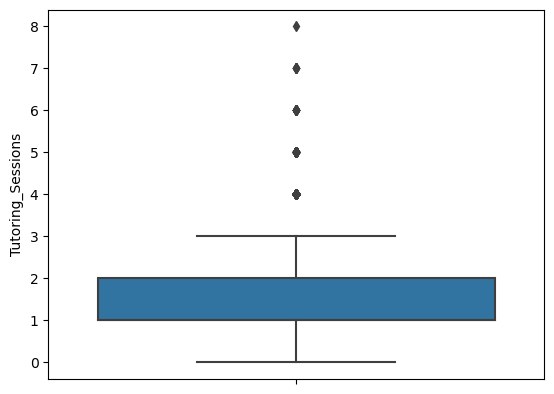

In [57]:
#now tutoring session
sns.boxplot(y=data['Tutoring_Sessions'])
plt.show()

In [58]:
pd.set_option('display.max_columns',None)
high_tut_ses=data[data['Tutoring_Sessions']>=6]
high_tut_ses

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Study_Hours
679,28,65,Medium,Medium,Yes,4,64,Medium,Yes,6,Medium,High,Public,Neutral,3,No,Postgraduate,Near,Male,70,Moderate
724,21,73,Medium,Medium,No,6,85,Medium,Yes,6,Medium,High,Public,Neutral,5,No,College,Near,Male,70,Moderate
1462,19,62,High,Medium,Yes,6,79,Low,Yes,7,Medium,Medium,Public,Neutral,2,No,High School,Near,Female,66,Moderate
1548,25,95,Low,Medium,No,7,78,Medium,Yes,7,Low,Medium,Public,Positive,4,No,High School,Near,Male,73,Moderate
1848,26,93,High,Low,No,6,94,Medium,Yes,6,High,Medium,Private,Negative,4,No,High School,Near,Female,74,Moderate
2040,16,66,Low,Medium,No,6,93,Medium,Yes,7,Low,Medium,Public,Negative,2,No,High School,Far,Male,63,Moderate
2198,16,92,Medium,Medium,Yes,4,90,High,Yes,6,High,Medium,Private,Neutral,3,No,High School,Near,Male,72,Moderate
2231,25,72,Low,Low,Yes,6,78,Low,Yes,8,Medium,High,Public,Positive,4,No,High School,Near,Male,69,Moderate
2237,14,81,Low,Medium,No,6,89,Medium,No,6,Low,High,Private,Neutral,3,No,College,Near,Female,67,Low
2265,27,97,High,High,No,8,72,Medium,Yes,6,Low,Medium,Public,Neutral,2,No,College,Near,Female,76,Moderate


In [59]:
high_tut_ses[continuous].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,22.346154,82.769231,6.692308,81.923077,6.346154,3.423077,71.076923
std,6.311528,12.763409,1.543223,12.214493,0.561591,1.270372,4.107779
min,9.000000,62.000000,4.000000,58.000000,6.000000,0.000000,63.000000
25%,17.250000,72.000000,6.000000,73.000000,6.000000,3.000000,67.500000
50%,24.000000,85.000000,6.000000,84.500000,6.000000,3.000000,71.500000
75%,26.750000,94.000000,7.750000,92.750000,7.000000,4.000000,74.000000
max,35.000000,99.000000,10.000000,100.000000,8.000000,6.000000,78.000000


In [60]:
data.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


In [61]:
corr_mat_high=high_tut_ses.corr()
corr_mat_high

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,0.361027,0.159215,-0.253363,-0.159293,0.080780,0.673149
Attendance,0.361027,1.000000,0.187145,0.066335,-0.217210,0.215954,0.856363
Sleep_Hours,0.159215,0.187145,1.000000,-0.113775,-0.056805,-0.216589,0.111152
Previous_Scores,-0.253363,0.066335,-0.113775,1.000000,-0.095095,0.339876,-0.060466
Tutoring_Sessions,-0.159293,-0.217210,-0.056805,-0.095095,1.000000,0.066849,-0.220076
Physical_Activity,0.080780,0.215954,-0.216589,0.339876,0.066849,1.000000,0.384438
Exam_Score,0.673149,0.856363,0.111152,-0.060466,-0.220076,0.384438,1.000000


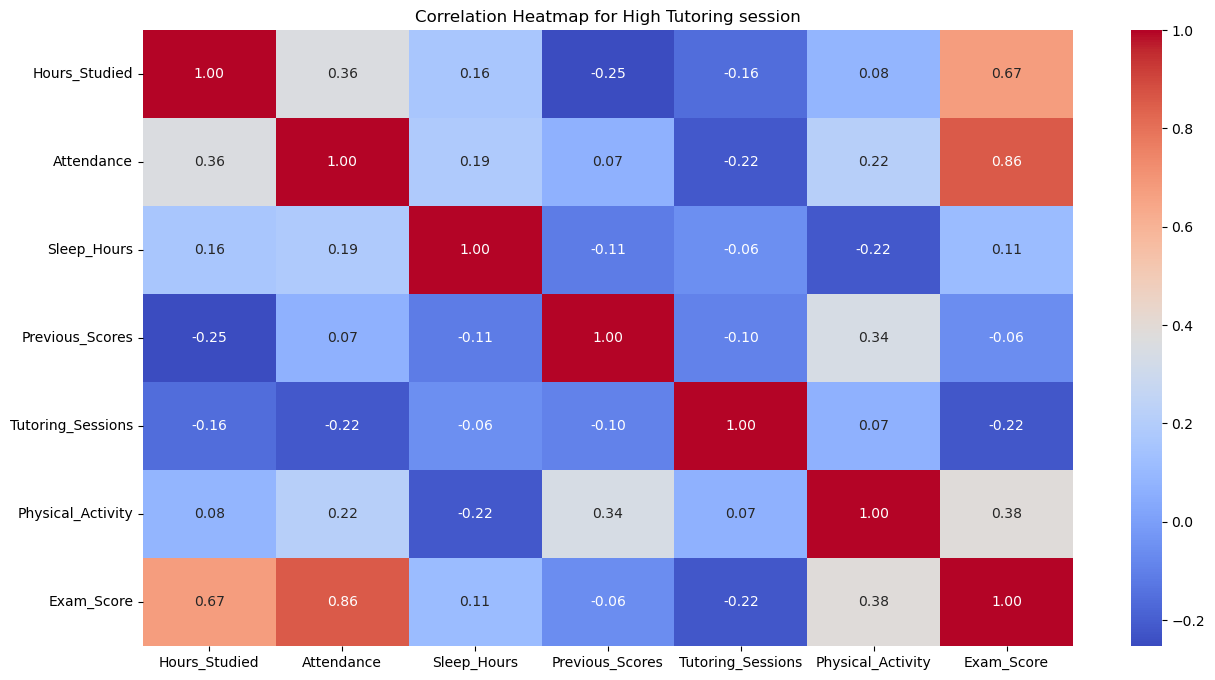

In [62]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_mat_high, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for High Tutoring session')
plt.show()

**Observation**
- **This is for those whose tutoring session is greater than or equal to 6**
- Here we can observe that attendance and then Hours Studied is highly correlated to Exam Score
- and on same hand study hours has no correlation with previous scores

# Exploratory Data Analysis

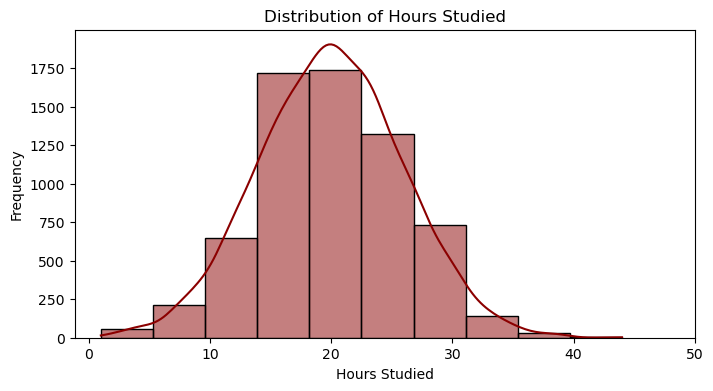

In [82]:
#Hours_Studied
plt.figure(figsize=(8, 4))
sns.histplot(data['Hours_Studied'], bins=10, kde=True, color='darkred')
plt.title('Distribution of Hours Studied')
plt.xticks([0,10,20,30,40,50])
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

In [79]:
data['Hours_Studied'].skew()

0.013498908859762987

**Observation**
- Study Hours is normally distributed
- most of the students have study hours between 10 to 30 hrs
- very few students study for less than 10 hrs or more than 30 hrs in a week

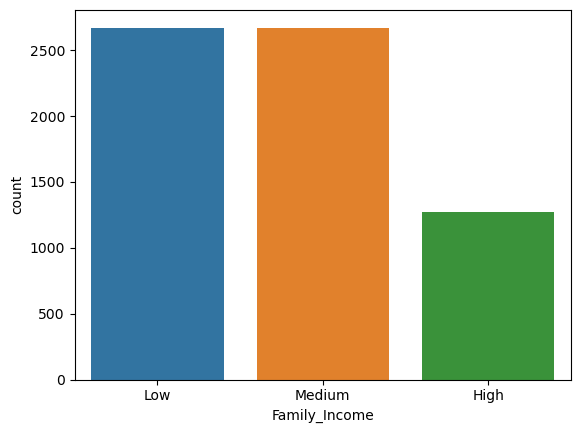

In [160]:
sns.countplot(x=data['Family_Income'])
plt.show()

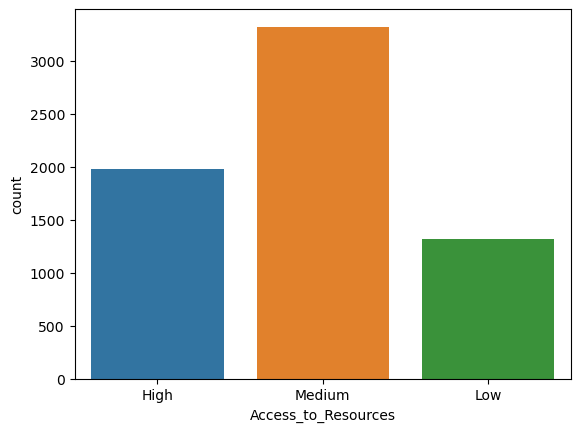

In [161]:
sns.countplot(x=data['Access_to_Resources'])
plt.show()

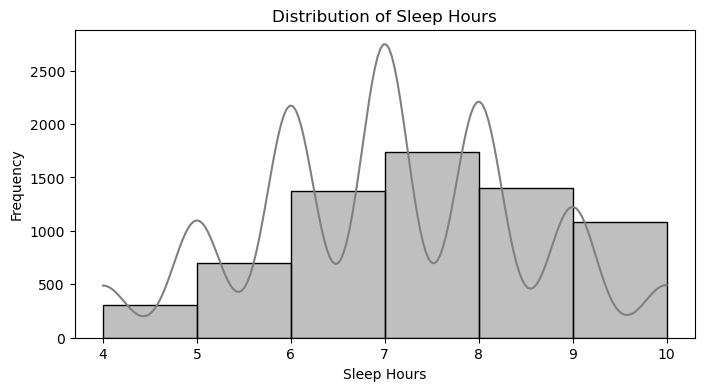

In [64]:
#Sleep_Hours
plt.figure(figsize=(8, 4))
sns.histplot(data['Sleep_Hours'], bins=6, kde=True, color='grey')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

**Observation**
- More number of students sleep for 6 to 9 hrs daily.
- most of the students take sleep of 7 to 8 hrs.
- least number of students take sleep of 4 to 5 hrs daily.

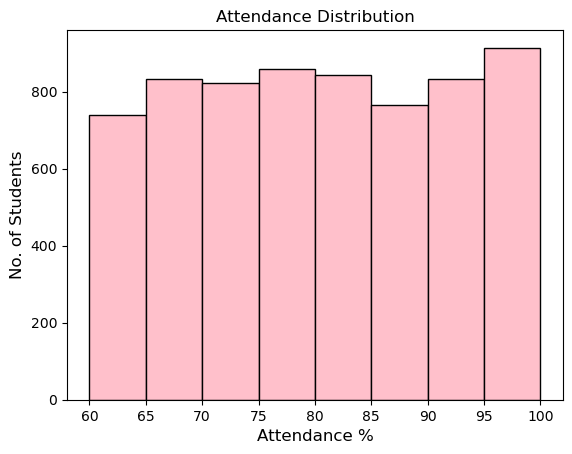

In [65]:
#Attendance
plt.hist(data['Attendance'],color='pink',edgecolor='black',bins=8)
plt.xlabel('Attendance %',fontsize=12)
plt.ylabel('No. of Students',fontsize=12)
plt.title("Attendance Distribution")
plt.show()

**Observation**
- From this plot it is very clear that more number of students have good attendance i.e. more than 75%

**Observation**
- from this scatter plot we can say that Exam Scores is not totally but slightly dependent on Study hours

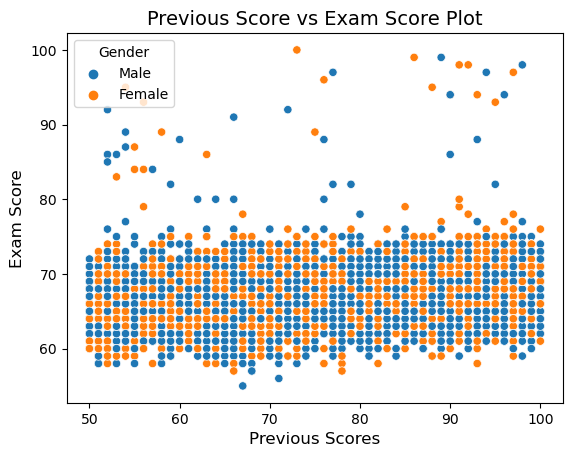

In [91]:
#Previous Score vs Exam Score
sns.scatterplot(data=data,x='Previous_Scores',y='Exam_Score',hue='Gender')
plt.xlabel('Previous Scores',fontsize=12)
plt.ylabel("Exam Score",fontsize=12)
plt.title("Previous Score vs Exam Score Plot",fontsize=14)
plt.show()

**Observation**
- There is no clear linear correaltion between previous scores and exam scores
- Some students with low previous score also perform well in exam score
- Some students with high previous score between 90 to 100 also perform well in exam score above 90.
- A few students show stark contrast in performance such as achieving low exam scores despite high previous scores.

**Now what is the reason behind this inconsistency?**

In [89]:
inconsistent=data[(data['Previous_Scores']>90) & (data['Exam_Score']<60)]
inconsistent

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Study_Hours
668,4,69,Medium,Low,No,9,93,Low,No,2,Medium,High,Private,Negative,3,No,High School,Moderate,Female,58,Low
1160,5,65,Medium,High,Yes,7,98,Low,Yes,1,Low,Low,Private,Positive,3,No,High School,Far,Male,59,Low
2101,15,60,Low,High,No,7,91,Low,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,59,Low
4774,6,73,Medium,Medium,No,8,93,Low,Yes,0,Low,Medium,Private,Neutral,1,Yes,High School,Far,Female,58,Low
4990,7,63,Low,Medium,No,5,97,Medium,Yes,1,Low,Medium,Public,Neutral,2,No,High School,Near,Female,59,Low


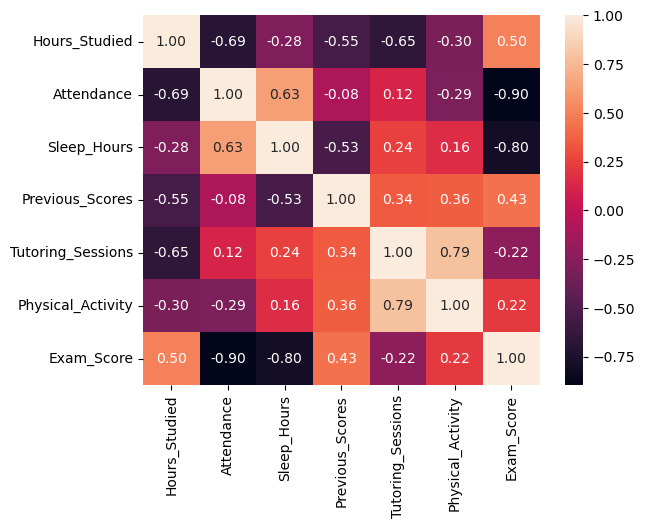

In [176]:
sns.heatmap(inconsitent.corr(),annot=True,fmt='0.2f')
plt.show()

**Observation**

- From this analysis we have observed that those students who have more than 90 marks in previous score but less than 60 marks in exam score
- They have low motivation level
- Their study hours is low
- Very low Tutoring session
- family income is low
- not much positive peer influence

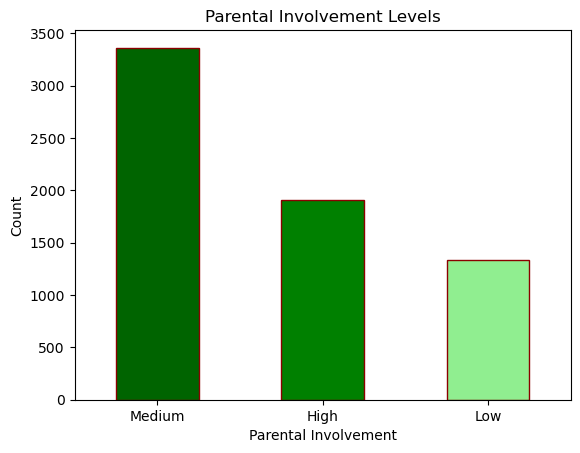

In [105]:
#creating plot for categorical columns
# Bar chart for Parental Involvement
data['Parental_Involvement'].value_counts().plot(kind='bar', color=['darkgreen','green','lightgreen'],edgecolor='darkred')
plt.title('Parental Involvement Levels')
plt.xticks(rotation=0)
plt.xlabel('Parental Involvement')
plt.ylabel('Count')
plt.show()

**Observation**
- More Students have Medium Parental Involvement
- less students have low parent involvement

# Anlysis of peer influence on students academic

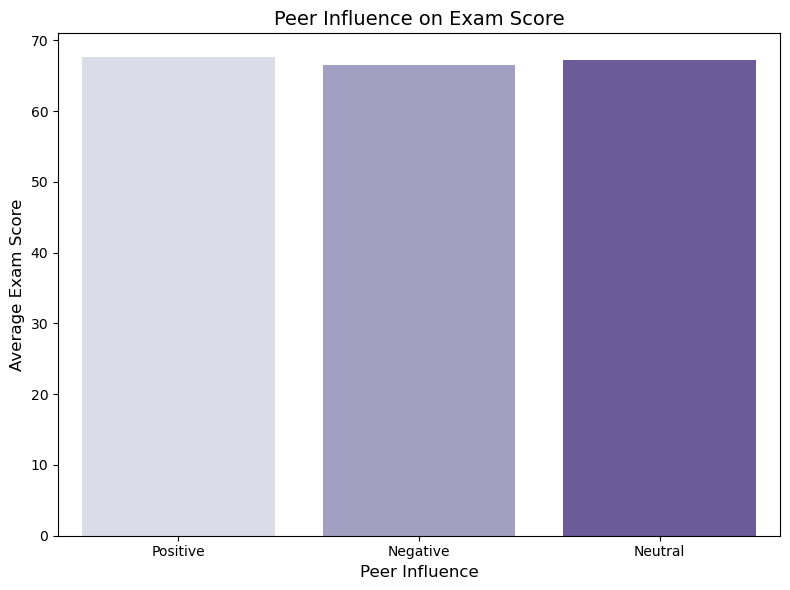

In [113]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Peer_Influence'], y=data['Exam_Score'], palette='Purples', ci=None)
plt.title('Peer Influence on Exam Score', fontsize=14)
plt.xlabel('Peer Influence', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.tight_layout()
plt.show()

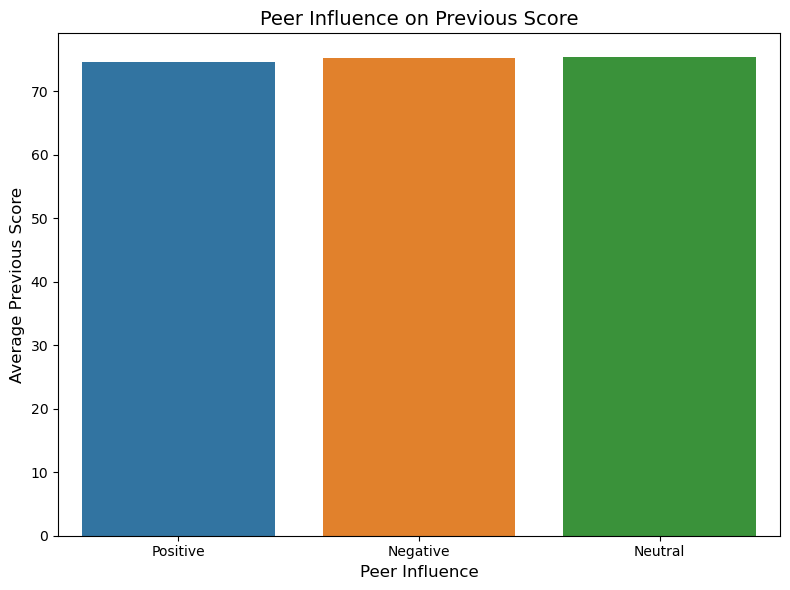

In [116]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Peer_Influence'], y=data['Previous_Scores'], ci=None)
plt.title('Peer Influence on Previous Score', fontsize=14)
plt.xlabel('Peer Influence', fontsize=12)
plt.ylabel('Average Previous Score', fontsize=12)
plt.tight_layout()
plt.show()

# Analysis of School Type

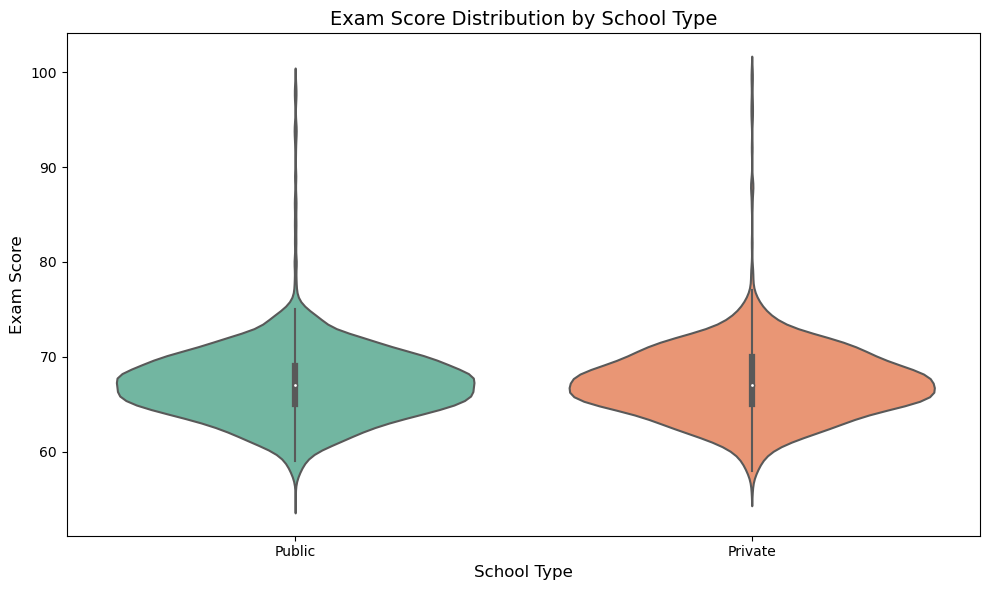

In [118]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['School_Type'], y=data['Exam_Score'], palette='Set2')
plt.title('Exam Score Distribution by School Type', fontsize=14)
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.tight_layout()
plt.show()

# Extracurricular activities impact

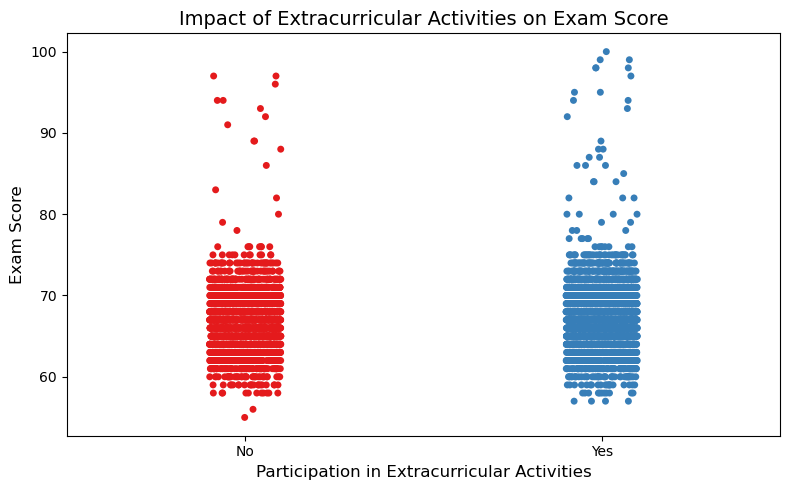

In [121]:
plt.figure(figsize=(8, 5))
sns.stripplot(x=data['Extracurricular_Activities'], y=data['Exam_Score'], palette='Set1')
plt.title('Impact of Extracurricular Activities on Exam Score', fontsize=14)
plt.xlabel('Participation in Extracurricular Activities', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.tight_layout()
plt.show()

# Factors Affecting Students performance

# 1. Study habits

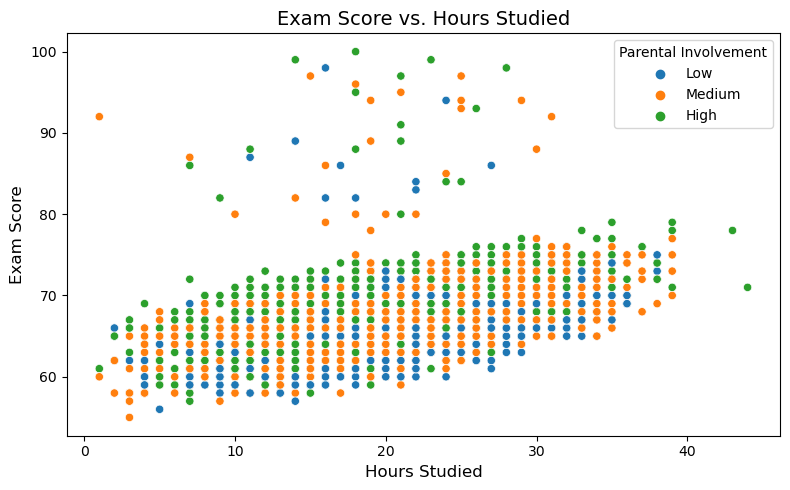

In [124]:
#Exam Scores vs Hours Studied and parental involvement
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'], hue=data['Parental_Involvement'])
plt.title('Exam Score vs. Hours Studied', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend(title='Parental Involvement')
plt.tight_layout()
plt.show()

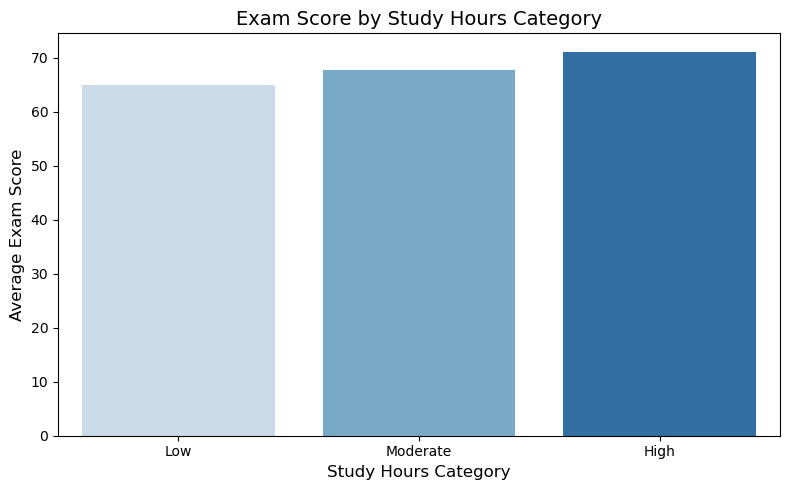

In [125]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['Study_Hours'], y=data['Exam_Score'], palette='Blues', ci=None)
plt.title('Exam Score by Study Hours Category', fontsize=14)
plt.xlabel('Study Hours Category', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.tight_layout()
plt.show()

In [140]:
#risk of underperforming
underperforming=data[(data['Attendance']<75)&(data['Study_Hours']=='Low')&
     (data['Motivation_Level']!='High')&(data['Previous_Scores']<=60)&
     (data['Peer_Influence']!='Positive')&(data['Parental_Involvement']!='High')
    &(data['Exam_Score']<=60)]
underperforming

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Study_Hours
285,8,73,Medium,Medium,No,7,60,Medium,No,0,High,Medium,Private,Neutral,3,No,High School,Near,Female,60,Low
524,15,63,Medium,Low,No,8,55,Low,Yes,0,Medium,Low,Public,Neutral,3,No,College,Near,Female,59,Low
1396,12,64,Medium,Medium,No,9,51,Low,No,2,Low,Medium,Public,Neutral,4,No,College,Near,Male,59,Low
2102,15,69,Medium,Medium,Yes,8,53,Low,No,0,High,Medium,Private,Negative,3,No,High School,Near,Male,60,Low
2203,12,70,Low,High,Yes,9,53,Medium,Yes,2,Low,Medium,Public,Neutral,2,Yes,High School,Near,Male,60,Low
2891,7,70,Medium,Medium,Yes,6,51,Medium,Yes,0,High,Medium,Private,Neutral,1,No,High School,Moderate,Female,59,Low
4425,13,64,Medium,High,No,6,57,Low,Yes,1,Low,Low,Public,Neutral,3,Yes,High School,Moderate,Female,58,Low
4639,3,70,Medium,Medium,Yes,7,58,Medium,Yes,0,Medium,Medium,Private,Neutral,2,No,High School,Moderate,Male,58,Low
5825,10,65,Low,High,No,7,55,Medium,Yes,0,Low,High,Public,Neutral,3,No,High School,Near,Female,59,Low
5919,13,70,Medium,Medium,Yes,6,53,Medium,Yes,2,Low,Medium,Public,Negative,0,Yes,College,Moderate,Female,60,Low


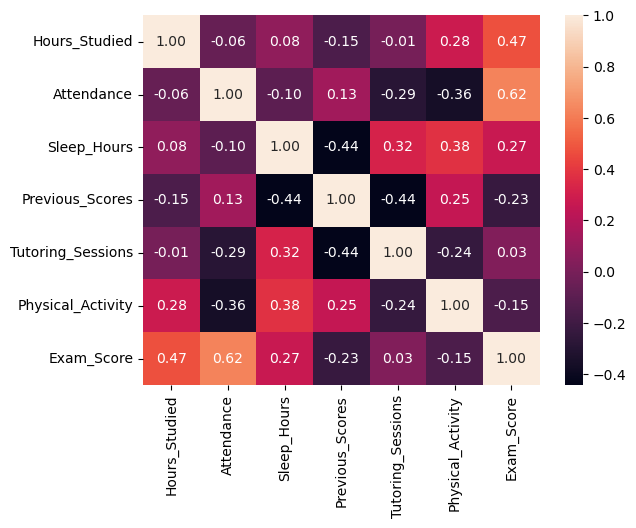

In [141]:
sns.heatmap(underperforming.corr(),annot=True,fmt='.2f')
plt.show()

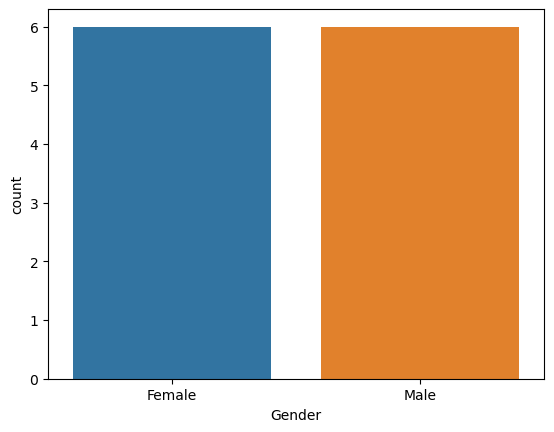

In [142]:
sns.countplot(x=underperforming['Gender'])
plt.show()

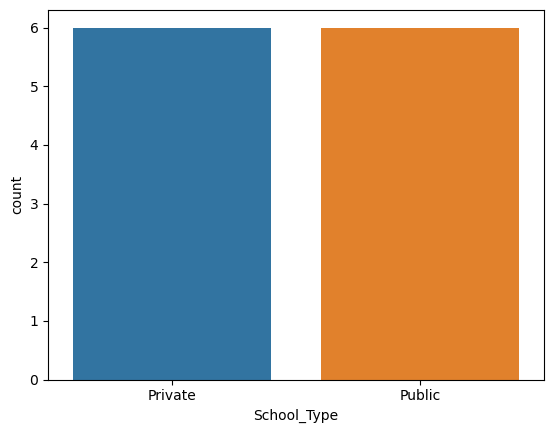

In [143]:
sns.countplot(x=underperforming['School_Type'])
plt.show()

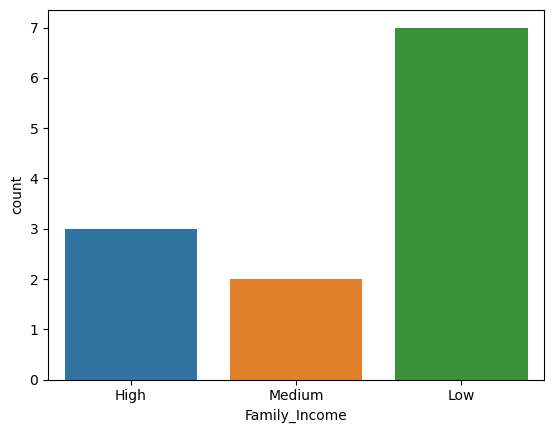

In [144]:
sns.countplot(x=underperforming['Family_Income'])
plt.show()

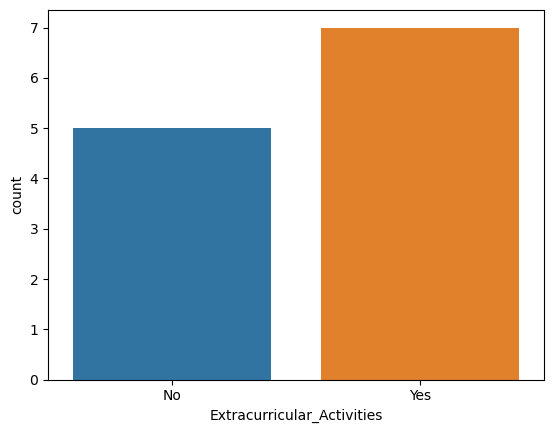

In [145]:
sns.countplot(x=underperforming['Extracurricular_Activities'])
plt.show()

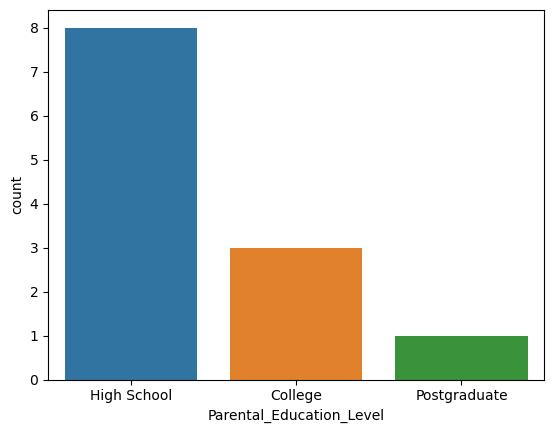

In [146]:
sns.countplot(x=underperforming['Parental_Education_Level'])
plt.show()

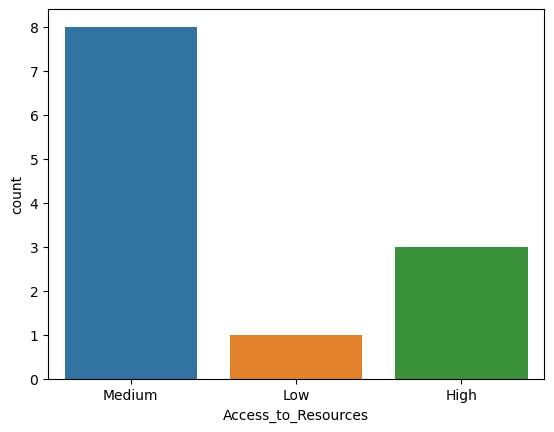

In [147]:
sns.countplot(x=underperforming['Access_to_Resources'])
plt.show()

**Observations**
1. Those students whose attendance is less than 75 and study hour is low i.e. less than 15 hrs in a week and
motivation level is not high and previous score is less than 60 and exam score is also less than or euqal to 60
and peer influence is not positive and parent involvement is not high those students comes under **risk of underperforming**
2. Gender and School Type has not any impact on underperformance
3. most of the Underperformed students family income is low
4. Most of the parents has just completed High school.

In [152]:
# Good performing Students
good=data[(data['Attendance']>=75)&
     (data['Previous_Scores']>=75)
    &(data['Exam_Score']>=75)]
good

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Study_Hours
113,35,99,High,High,Yes,7,85,Low,Yes,2,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79,High
209,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78,High
222,24,100,High,High,Yes,6,86,Low,Yes,2,Medium,Medium,Private,Positive,5,No,High School,Near,Male,75,Moderate
397,28,89,Medium,High,Yes,10,97,High,Yes,3,Medium,Low,Public,Negative,6,No,High School,Near,Female,75,Moderate
519,25,99,High,Medium,Yes,6,97,High,Yes,0,Medium,Medium,Public,Positive,3,No,College,Moderate,Male,75,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,37,96,Medium,Medium,No,7,77,Medium,Yes,2,Medium,Medium,Public,Positive,3,No,High School,Moderate,Female,75,High
6365,31,91,Medium,High,Yes,7,94,High,Yes,2,High,High,Public,Negative,3,No,High School,Far,Male,75,High
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98,Moderate
6532,29,97,Medium,High,Yes,9,92,Medium,Yes,2,Low,Medium,Public,Positive,4,No,High School,Moderate,Female,75,Moderate


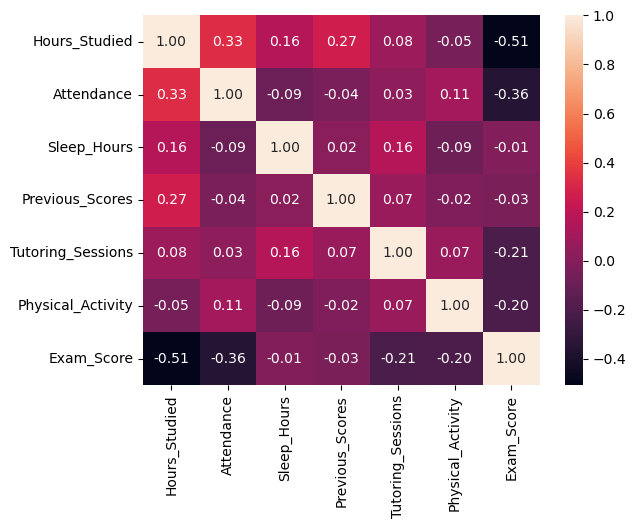

In [154]:
sns.heatmap(good.corr(),annot=True,fmt='.2f')
plt.show()

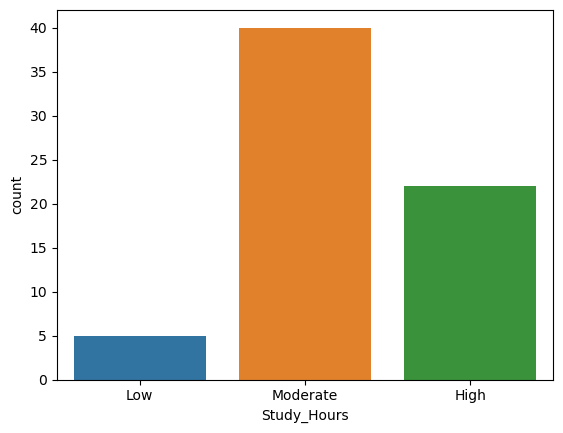

In [155]:
sns.countplot(x=good['Study_Hours'])
plt.show()

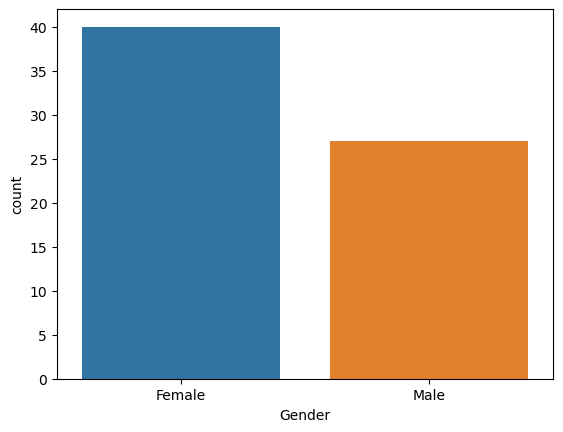

In [156]:
sns.countplot(good['Gender'])
plt.show()

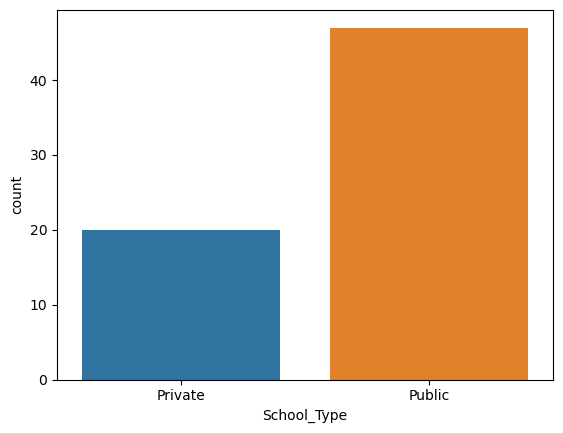

In [157]:
sns.countplot(x=good['School_Type'])
plt.show()

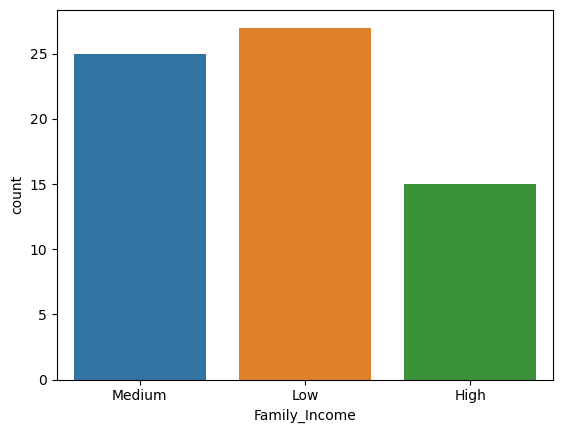

In [158]:
sns.countplot(x=good['Family_Income'])
plt.show()

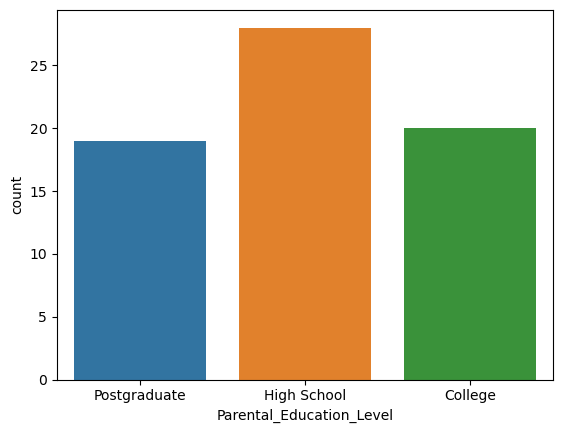

In [162]:
sns.countplot(x=good['Parental_Education_Level'])
plt.show()

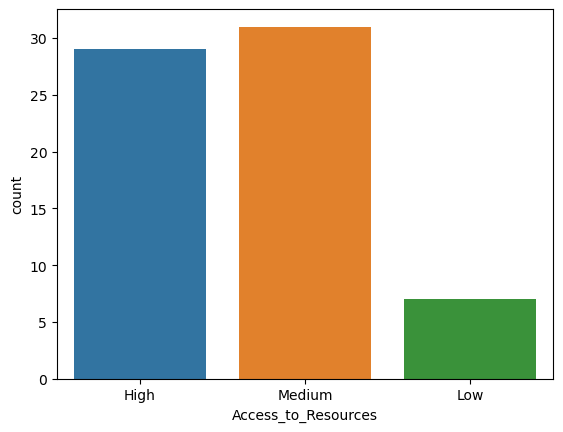

In [163]:
sns.countplot(x=good['Access_to_Resources'])
plt.show()

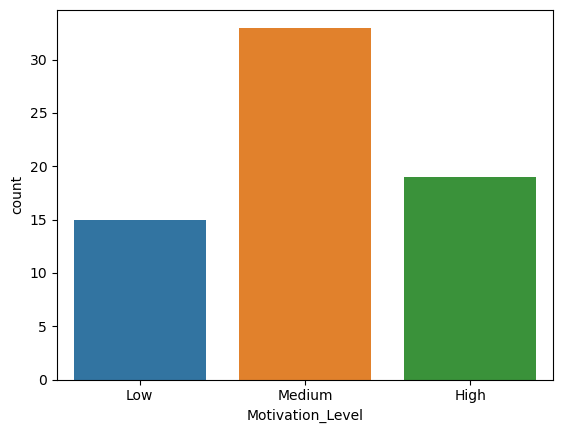

In [164]:
sns.countplot(x=good['Motivation_Level'])
plt.show()

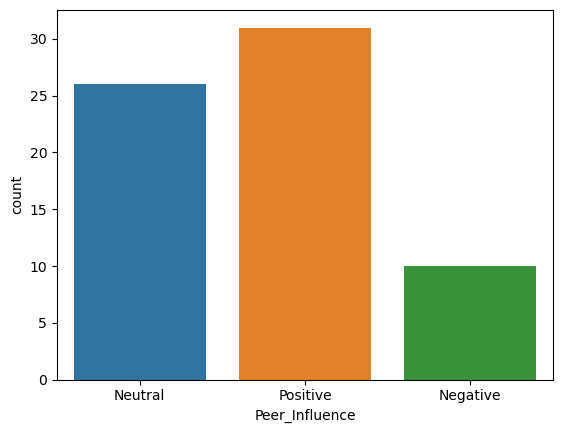

In [167]:
sns.countplot(x=good['Peer_Influence'])
plt.show()

**Observation**
- Tillnow from observation it is observed that Access to resources and Peer Influences are the main reasons
for good students and bad performing students.
(after attendance and study hours)

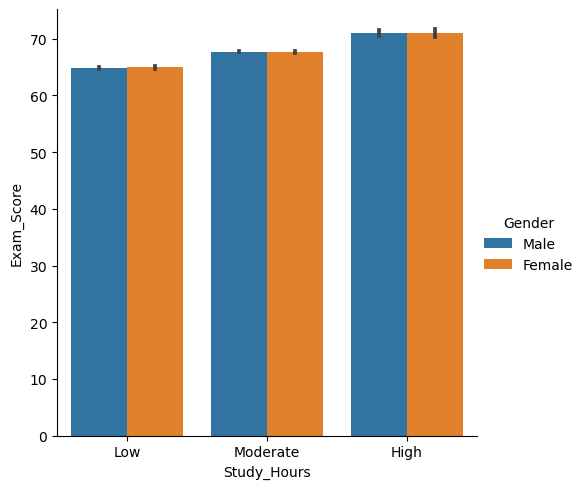

In [168]:
sns.catplot(data=data,x='Study_Hours',y='Exam_Score',hue='Gender',kind='bar')
plt.show()

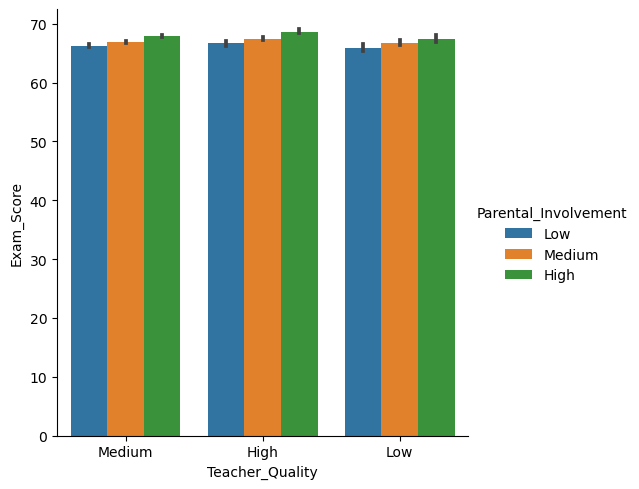

In [173]:
sns.catplot(data=data,x='Teacher_Quality',y='Exam_Score',hue='Parental_Involvement',kind='bar')
plt.show()

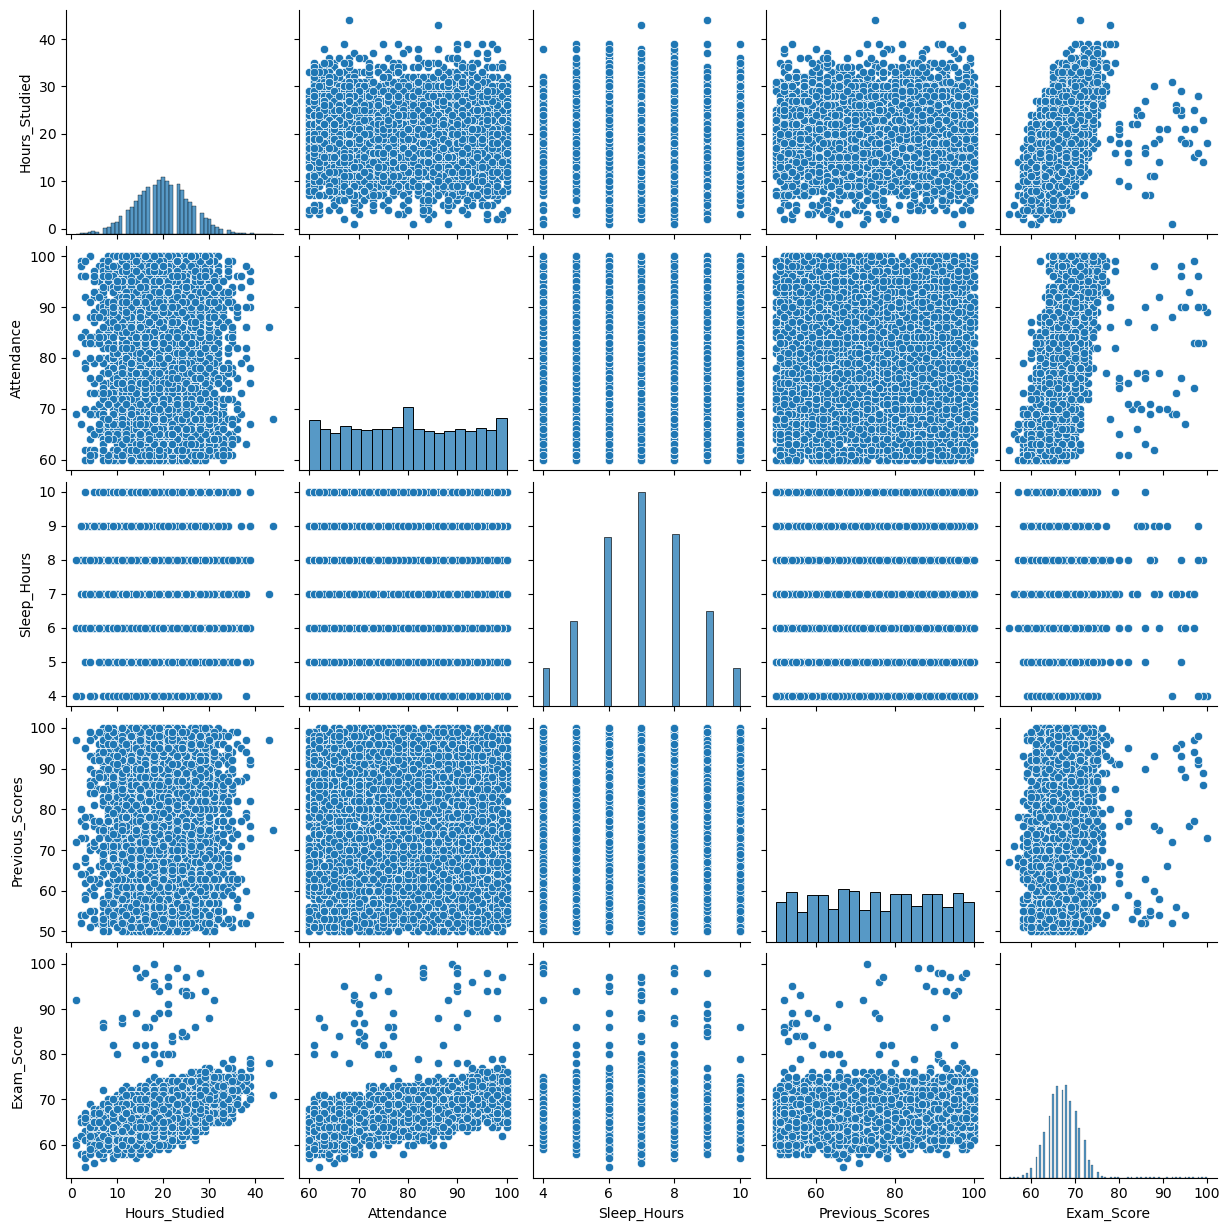

In [175]:
sns.pairplot(data,vars=['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Exam_Score'])
plt.show()

# Observations

- Increment in Resources, Study Hours, Attendance and Tutoring Session is Required for Better Performance